In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

##### 1.数据导入与预处理

In [2]:
iris = pd.read_csv('./Desktop/iris.csv')
iris1 = iris.drop("target",axis = 1)
iris1 = iris1.drop(["sepal length (cm)","sepal width (cm)"],axis=1)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris1["species"] = encoder.fit_transform(iris["species"])

from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
td_std = trans.fit_transform(iris1[["petal length (cm)",'petal width (cm)']])#有两个列，所以需要再加一个方括号
td_std = pd.DataFrame(td_std,columns = ["petal length (cm)",'petal width (cm)'])#有两个列，所以需要再加一个方括号


##### 2.训练集与测试集

In [3]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(iris1,test_size = 0.2)

train_set_x = train_set[["petal length (cm)","petal width (cm)"]]
train_set_y = train_set["species"]
test_set_x = test_set[["petal length (cm)","petal width (cm)"]]
test_set_y = test_set["species"]

In [8]:
# 定义绘图函数 draw（）
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
def draw(clf):        
    M, N = 500, 500 
    x1_min,  x2_min  =  iris1[["petal length (cm)","petal width (cm)"]]. min(axis=0) #  取两根轴的最值，axis=0 表示沿竖轴运作，
    x1_max,  x2_max  =  iris1[["petal length (cm)","petal width (cm)"]]. max(axis=0) #  因此取的就是花瓣长度和宽度的最值。
    t1  =  np.linspace(x1_min,  x1_max,  M)  #  将两根轴等差均分成 500 段并赋值给向量t1 t2     
    t2 = np.linspace(x2_min, x2_max, N)     
    x1, x2 = np.meshgrid(t1, t2)     # 用 meshgrid 生成两个数组，第一个是t1，t2交叉后所有点的横坐标；第二个数组是纵坐标；并分别把所有横，纵坐标赋值给x1和x2两个向量    
    # 预测
    x_show  =  np.stack((x1.flat,  x2.flat),  axis=1)  #flat 功能先将 x1 和 x2 拉平成长度为【500】的数组，stack函数在第二维度（axis=1）上增加，
    #组成【500，2】的矩阵，每一行其实就是某一个点的坐标。    
    
    y_predict = clf.predict(x_show)#为每个点预测分类结果，为绘制预测区域做准备。形状为【500，1】          
    # 配色    
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])   
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])       
    # 绘制预测区域图    
    plt.figure(figsize=(10, 6))#生成图像区域，并指定比例    
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)     
    # pcolormesh用来画背景预测区域，t1横坐标，t2纵坐标，第三项分类标签，第四项颜色        
    # 绘制原始数据点    
    plt.scatter(iris1["petal length (cm)"],iris1["petal width (cm)"],c=iris1["species"], label=None, cmap=cm_dark, marker='o', edgecolors='k')   
    plt.xlabel("Petal.Length")    
    plt.ylabel("Petal.Width")
    
    # 绘制图例    
    color = ["g", "r", "b"]    
    species = ["setosa", "virginica", "versicolor"]    
    for i in range(3):        
        plt.scatter([], [], c=color[i], s=40, label=species[i])    # 利用空点绘制图例：    
    
    plt.legend(loc="best")
    
    plt.title('iris_classfier')

## 3.算法实现 决策树

##### 建模

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4)
clf

#max_depth 太大可能会有过拟合。

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### 训练

In [14]:
clf.fit(train_set_x,train_set_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### 预测

In [20]:
res = clf.predict(test_set_x)
print(res)
print(test_set_y.values)

[1 1 1 0 0 1 0 1 0 2 0 2 2 2 0 2 2 2 1 1 1 1 1 2 1 1 1 2 1 0]
[1 2 1 0 0 1 0 1 0 2 0 2 2 2 0 2 2 2 1 1 1 1 1 2 1 1 1 2 1 0]


##### 评估

In [19]:
accuracy = clf.score(test_set_x,test_set_y)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%
[1 2 1 0 0 1 0 1 0 2 0 2 2 2 0 2 2 2 1 1 1 1 1 2 1 1 1 2 1 0]


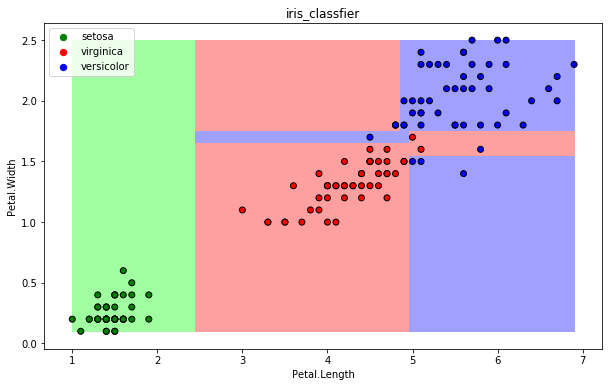

In [21]:
draw(clf)

## 算法实现 随机森林

##### 建模

In [25]:
from sklearn.ensemble import RandomForestClassifier # 导入随机森林,并学习一下其中重要参数
RandomForestClassifier(n_estimators='warn',criterion='gini',max_depth=None)

# n_estimator此处决定树的棵数，默认100棵   
# criterion 此处决定特征划分的方法，默认使用CART算法的GINI系数   
# max_depth此处决定树的最大深度

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
clf = RandomForestClassifier(n_estimators=20) 
clf # 将随机森林设置成求解器对象clf，并检查重要参数训练clf.fit(train_x_set,train_y_set)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### 训练

In [28]:
clf.fit(train_set_x,train_set_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### 预测

In [29]:
res = clf.predict(test_set_x) 
print(res) 
print(test_set_y.values)

[1 1 1 0 0 1 0 1 0 2 0 2 2 2 0 2 2 2 1 1 1 1 1 2 1 1 1 2 1 0]
[1 2 1 0 0 1 0 1 0 2 0 2 2 2 0 2 2 2 1 1 1 1 1 2 1 1 1 2 1 0]


##### 评估

In [30]:
accuracy = clf.score(test_set_x,test_set_y) 
print(" 预测正确率:{:.0%}".format(accuracy))

 预测正确率:97%


##### 结果可视化

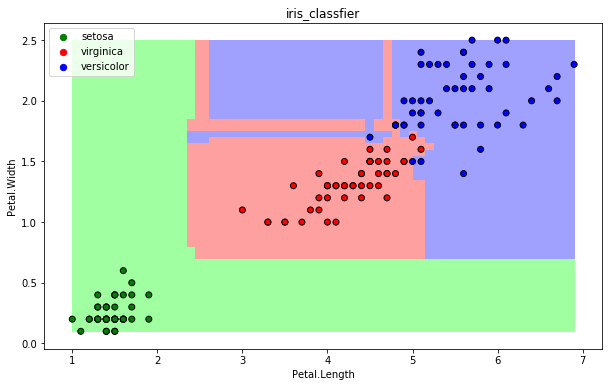

In [31]:
# 绘图
draw(clf) 


In [33]:
# 结果输出
out = test_set_x.copy() 
out["y"] = test_set_y
out["pre"] = res
out.head() 
#out.to_csv("iris_predict_rf.csv")

,petal length (cm),petal width (cm),y,pre
50,4.7,1.4,1,1
138,4.8,1.8,2,1
60,3.5,1.0,1,1
4,1.4,0.2,0,0
0,1.4,0.2,0,0
